In [3]:
import imp 
import tree_functions as tree
imp.reload(tree)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time

In [906]:
n = 1000 
n_small = 100
z_range = 8
r_gen = 0.5
r_s_gen = 0.9
mean_gen = 0
sd_gen = 1 

fig_size = (12, 8)
fig_size1 = (8, 5.333)

figures_file = 'figures/' 
figures_param = '_n' + str(n) + '_' + 'r' + str(int(r_gen * 100)) + '_' + 'r_s' + \
                str(int(r_s_gen * 100)) + '_.png'

In [907]:
# plt.style.use('default')

In [908]:
# Initialize parent distribution
parent_distribution = tree.normal_distribution(n, z_range, mean_gen, sd_gen)
parent_distribution_small = tree.normal_distribution(n_small, z_range, mean_gen, sd_gen)


In [961]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

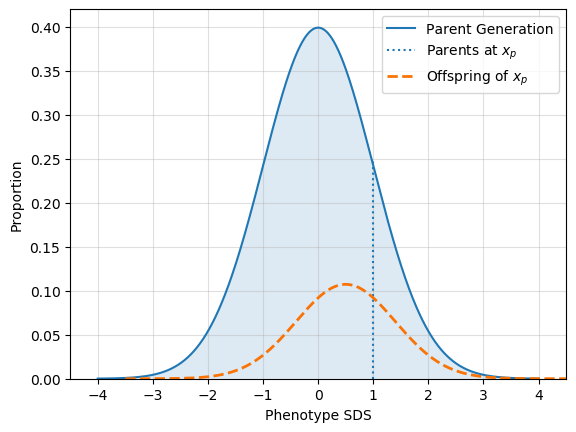

In [1052]:
parent_index = tree.z_score_to_index(z_score=1, number_of_steps=n, \
                                     z_score_range=z_range)
single_offspring_distribution2 = tree.one_offspring_distribution(parent_distribution, \
                                                                 parent_index, 0.5, r_s_gen)
# plt.figure(figsize=fig_size1)
# plt.title('True (some) regression to the mean. Inheritance. r = 0.5.')
tree.plot_distribution(parent_distribution, label='Parent Generation', linestyle=None)
plt.fill_between([row[0] for row in parent_distribution], \
                 [row[1] for row in parent_distribution], alpha=0.15)
plt.axvline(x=1, linestyle=':', \
            ymax=tree.f_norm(1,0,1)/0.41, label='Parents at $x_p$', alpha=1)
tree.plot_distribution(single_offspring_distribution2, label='Offspring of $x_p$',\
                      color='xkcd:orange', linestyle='--', lw=2)
# plt.axvline(x=0.5, linestyle='--', label='x = 0.5', color='orange')
plt.xlim(-4.5, 4.5)
plt.ylim(0,0.42)
plt.legend()
plt.grid(alpha=0.4)
plt.savefig(figures_file + 'individual_offspring' + figures_param, dpi=300)
plt.show()

In [43]:
offspring_distributions_ = tree.offspring_distributions(parent_distribution_small, r_gen, r_s_gen)

In [972]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

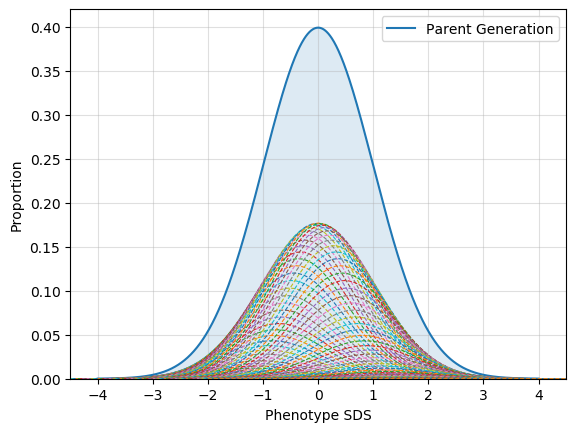

In [1060]:
# plt.figure(figsize=fig_size1)
plt.xlim(-4.5, 4.5)
plt.ylim(0,0.42)
tree.plot_distribution(parent_distribution, label='Parent Generation')
plt.fill_between([row[0] for row in parent_distribution], \
                 [row[1] for row in parent_distribution], alpha=0.15)
tree.plot_distributions(offspring_distributions_, linestyle='--') 
plt.legend()
plt.grid(alpha=0.4)
plt.savefig(figures_file + 'offspring_distributions' + figures_param, dpi=300)
plt.show()

In [28]:
# Initialize total offspring distribution
total_offspring_distribution = \
tree.final_superimposed_distribution_all_area_adj(parent_distribution, r_gen, r_s_gen)  

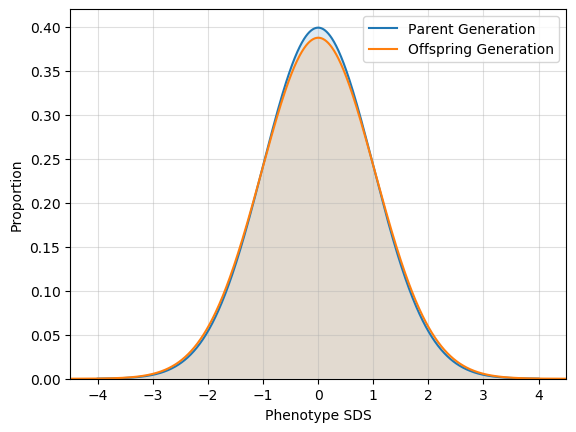

In [1058]:
# plt.figure(figsize=fig_size1)
plt.xlim(-4.5, 4.5)
plt.ylim(0,0.42)
tree.plot_distribution(parent_distribution, label='Parent Generation') 
plt.fill_between([row[0] for row in parent_distribution], \
                 [row[1] for row in parent_distribution], alpha=0.15)
tree.plot_distribution(total_offspring_distribution, label='Offspring Generation') 
plt.fill_between([row[0] for row in total_offspring_distribution], \
                 [row[1] for row in total_offspring_distribution], alpha=0.15)
plt.legend()
plt.grid(alpha=0.4)
plt.savefig(figures_file + 'offspring_generation' + figures_param, dpi=300)
plt.show()

In [190]:
print(tree.st_dev_of_distribution(parent_distribution))
print(tree.st_dev_of_distribution(total_offspring_distribution))

0.9994724998242689
1.0293685089662092


In [191]:
1.0293685089662092 / 0.9994724998242689

1.0299117876151638

In [156]:
step_percentile = tree.step_proportion_attributable_percentile(parent_distribution, r_gen, \
                                        r_s_gen, 0.2, total_offspring_distribution)

In [323]:
print(step_percentile)

[[[0.8, 1], [[[0.8, 1], 0.4263890080705017], [[0.6, 0.8], 0.25483399322911093], [[0.4, 0.6], 0.16778914641205833], [[0.2, 0.4], 0.10578208528302459], [[0.0, 0.2], 0.04520576700530366]]], [[0.6, 0.8], [[[0.8, 1], 0.2524243493923893], [[0.6, 0.8], 0.2505339190164547], [[0.4, 0.6], 0.21656439047368642], [[0.2, 0.4], 0.17587259787047277], [[0.0, 0.2], 0.10460474324699667]]], [[0.4, 0.6], [[[0.8, 1], 0.16793231306484066], [[0.6, 0.8], 0.21898416484085728], [[0.4, 0.6], 0.2261670441886042], [[0.2, 0.4], 0.21898416484085728], [[0.0, 0.2], 0.16793231306484074]]]]


In [216]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

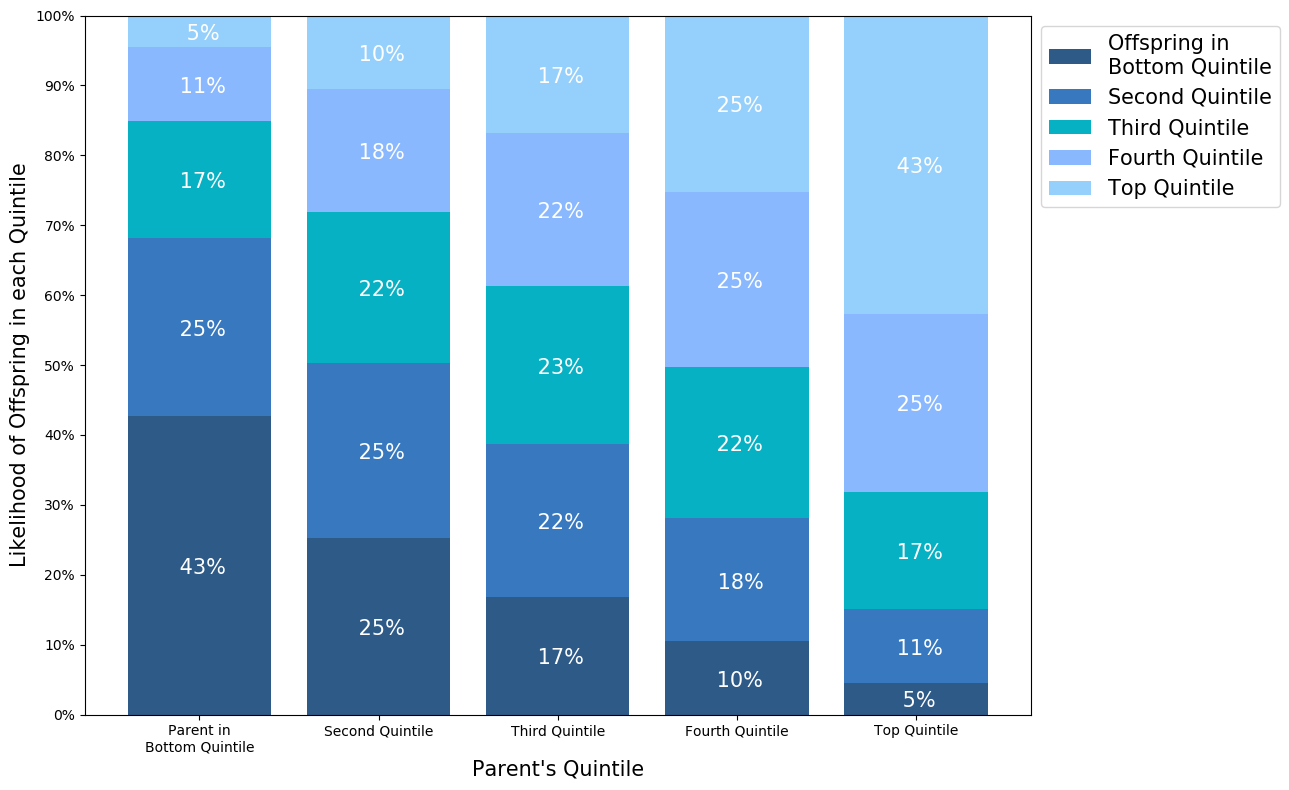

In [217]:
plt.figure(figsize=(13,8))
tree.bar_graph_step(step_percentile)
plt.tight_layout()
plt.savefig(figures_file + 'model_mobility' + figures_param, dpi=300)
plt.show()

Chetty

In [212]:
chetty_transposed = \
[[0.337, 0.242, 0.178, 0.134, 0.109],
[0.28, 0.242, 0.198, 0.16, 0.119],
 [0.184, 0.217, 0.221, 0.209, 0.17],
 [0.123, 0.176, 0.22, 0.244, 0.236],
 [0.075, 0.123, 0.183, 0.254, 0.365]
]

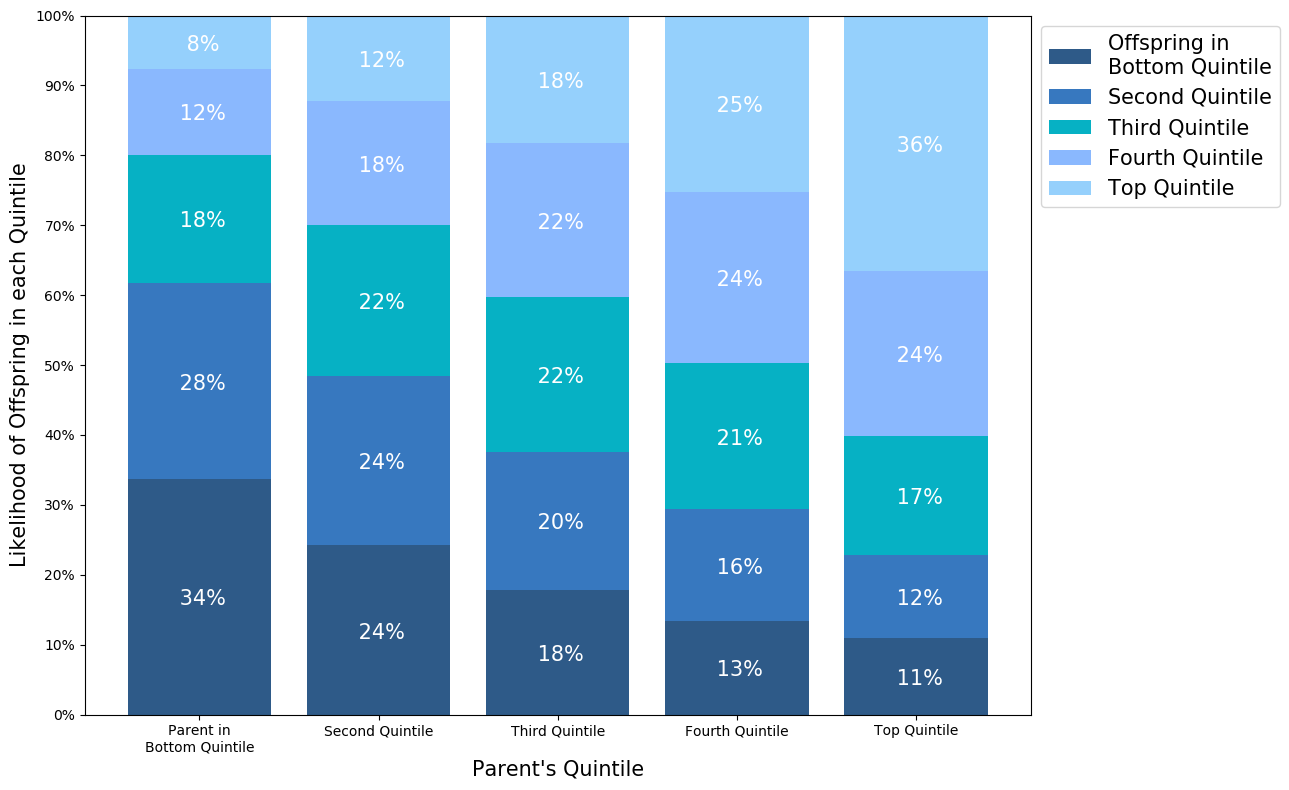

In [213]:
plt.figure(figsize=(13,8))
tree.plot_mobility(chetty_transposed)
plt.tight_layout()
plt.savefig(figures_file + 'chetty_mobility.png', dpi=300)
plt.show()

In [14]:
galton_motivating = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0022396416573348264, 0.002244668911335578, 0.016835016835016835, 0.016930022573363433, 0.023728813559322035, 0.02937853107344633, 0.029646522234891677, 0.037800687285223365, 0.03634232121922626, 0.04561824729891957, 0.07255139056831923, 0.0853960396039604, 0.0973111395646607, 0.11140235910878113, 0.13692946058091288, 0.14868804664723032, 0.182370820668693, 0.1966205837173579, 0.20535714285714285, 0.25812619502868067, 0.31189083820662766, 0.3210161662817552, 0.35697399527186763, 0.43828715365239296, 0.4327485380116959, 0.4794007490636704, 0.5083333333333333, 0.5888324873096447, 0.5870967741935483, 0.631578947368421, 0.5961538461538461, 0.5952380952380952, 0.6329113924050633, 0.5490196078431373, 0.5869565217391305, 0.5882352941176471, 0.5833333333333334, 0.5909090909090909, 0.6875, 0.6, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [223]:
tree_problem_range = tree.step_tree_question_z_score(parent_distribution, r_gen, r_s_gen, \
                                                     z_score_increment=0.125, z_score_bound=8)

In [322]:
# n = 1000, r = 0.5, r_s = 0.9
print(tree_problem_range)

[1.0607234307163067e-06, 2.1684852989754026e-05, 5.707106322007794e-05, 0.00010941089586124643, 0.00019642915975198608, 0.0003314949913234215, 0.000521656593322475, 0.0008227159702653494, 0.001266687799774058, 0.0018595315508106345, 0.002753693553457202, 0.00390902693344451, 0.0055936404269450665, 0.007871286968642241, 0.010662177378533796, 0.014522941524591337, 0.01949165096783783, 0.025266806659316073, 0.032921510026308734, 0.041523355003031545, 0.05260204374128384, 0.06562716332920467, 0.07964955518775461, 0.09701506344945901, 0.11672113032723055, 0.13690297355447362, 0.1610720388007312, 0.18488703575973567, 0.2131670549357876, 0.24340653852698685, 0.2725140400702054, 0.30585104591041856, 0.340454661559264, 0.3721896956581155, 0.40833027076641876, 0.4414035405813149, 0.47802314722199507, 0.5144849166804878, 0.5463690818223952, 0.5817270872035313, 0.6161688644736479, 0.6461840248145267, 0.6782804029195254, 0.7058342744059827, 0.7344453613618807, 0.7619652367000046, 0.785113000407589,

In [12]:
tree_problem_range = np.array([1.0607234307163067e-06, 2.1684852989754026e-05, 5.707106322007794e-05, 0.00010941089586124643, 0.00019642915975198608, 0.0003314949913234215, 0.000521656593322475, 0.0008227159702653494, 0.001266687799774058, 0.0018595315508106345, 0.002753693553457202, 0.00390902693344451, 0.0055936404269450665, 0.007871286968642241, 0.010662177378533796, 0.014522941524591337, 0.01949165096783783, 0.025266806659316073, 0.032921510026308734, 0.041523355003031545, 0.05260204374128384, 0.06562716332920467, 0.07964955518775461, 0.09701506344945901, 0.11672113032723055, 0.13690297355447362, 0.1610720388007312, 0.18488703575973567, 0.2131670549357876, 0.24340653852698685, 0.2725140400702054, 0.30585104591041856, 0.340454661559264, 0.3721896956581155, 0.40833027076641876, 0.4414035405813149, 0.47802314722199507, 0.5144849166804878, 0.5463690818223952, 0.5817270872035313, 0.6161688644736479, 0.6461840248145267, 0.6782804029195254, 0.7058342744059827, 0.7344453613618807, 0.7619652367000046, 0.785113000407589, 0.8092582163634641, 0.8315966415416379, 0.8500544886513569, 0.8686074927039905, 0.8841354996229802, 0.8999453468224619, 0.9141939445331742, 0.9256848316297555, 0.9372622027581169, 0.9473930188193965, 0.9557198340696658, 0.9640640885240354, 0.9708359528101652, 0.9776424918109701, 0.9838322945503613, 0.9890511327386948, 0.994574440652951, 1.0])

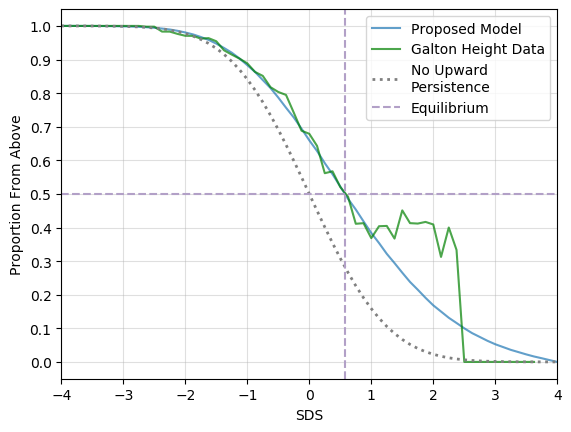

In [1045]:
# plt.figure(figsize=fig_size)
# plt.xlim(-4.5, 4.5)
plt.xlim(-4,4)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.4)
plt.plot(np.arange(-4, 4.125, 0.125), 1 - tree_problem_range, alpha=0.7, label='Proposed Model')
plt.plot(np.arange(-4, 3.75, 0.125), 1 - galton_motivating, color='green', alpha=0.7, 
             label='Galton Height Data')
plt.plot(np.arange(-4, 4.125, 0.125), 1 - st.norm.cdf(np.arange(-4, 4.125, 0.125)), \
         color='grey', linestyle=':', label='No Upward\nPersistence', lw=2)
plt.axhline(y=0.5, linestyle='--', color='#b2a0c7', label='Equilibrium')
plt.axvline(x=0.575, linestyle='--', color='#b2a0c7')
plt.xlabel('SDS')
plt.ylabel('Proportion From Above')
plt.legend()
plt.savefig(figures_file + 'persistence_sds' + figures_param, dpi=300)
plt.show()


In [18]:
pers = list()
for value in np.arange(-4, 4.125, 0.125):
    pers.append(st.norm.cdf(value))
    
pers1 = list()
for value in np.arange(-4, 3.75, 0.125):
    pers1.append(st.norm.cdf(value))

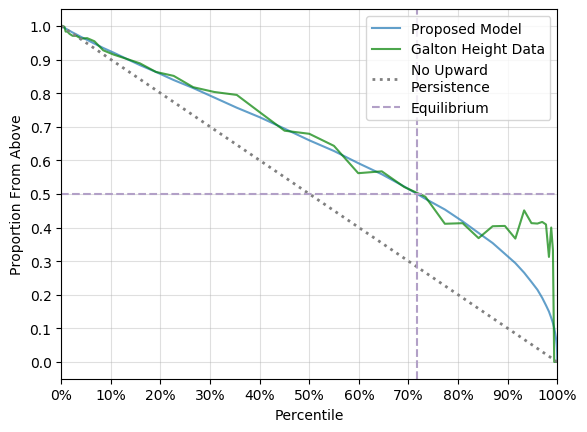

In [1044]:
from matplotlib.ticker import PercentFormatter

# plt.figure(figsize=fig_size)
plt.xlim(0, 1)
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.4)
plt.plot(pers, 1 - tree_problem_range, alpha=0.7, label='Proposed Model')
plt.plot(pers1, 1 - galton_motivating, color='green', alpha=0.7, label='Galton Height Data')
plt.plot([1,0], color='grey', linestyle=':', label='No Upward\nPersistence', lw=2)
plt.axhline(y=0.5, linestyle='--', color='#b2a0c7')
plt.axvline(x=st.norm.cdf(0.575), linestyle='--', color='#b2a0c7', label='Equilibrium')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Percentile')
plt.ylabel('Proportion From Above')
plt.legend(loc='upper right')
plt.savefig(figures_file + 'persistence_percentile' + figures_param, dpi=300)
plt.show()

In [307]:
st.norm.cdf(0.575)

0.7173543515027994

In [23]:
eq = 0.575
offspring_par_top_equil = tree.final_superimposed_distribution(parent_distribution, r_gen, \
                                                               r_s_gen, above_k_v_p=eq)
offspring_par_bottom_equil = tree.final_superimposed_distribution(parent_distribution, r_gen, \
                                                                  r_s_gen, below_k_v_p=eq)

In [1006]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

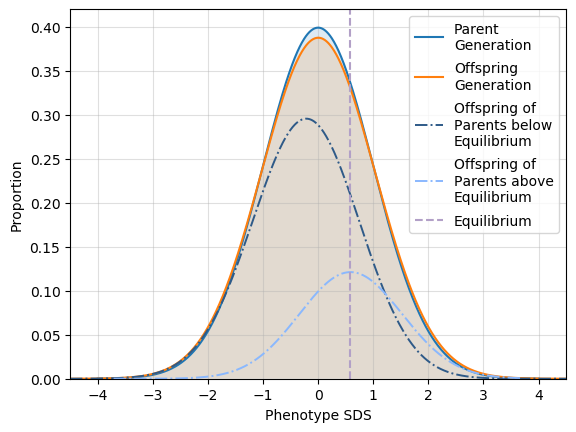

In [1061]:
# plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution, label='Parent\nGeneration')  
plt.ylim(0, 0.42)
# plt.plot([0])
plt.fill_between([row[0] for row in parent_distribution], \
                 [row[1] for row in parent_distribution], alpha=0.15)
tree.plot_distribution(total_offspring_distribution, label='Offspring\nGeneration') 
plt.fill_between([row[0] for row in total_offspring_distribution], \
                 [row[1] for row in total_offspring_distribution], alpha=0.15)
tree.plot_distribution(offspring_par_bottom_equil, \
                       label='Offspring of\nParents below\nEquilibrium', \
                       color='xkcd:light navy blue', linestyle='-.', lw=1.4) 
tree.plot_distribution(offspring_par_top_equil, \
                       label='Offspring of\nParents above\nEquilibrium', \
                       color='xkcd:carolina blue', linestyle='-.', lw=1.4)
plt.axvline(x=eq, linestyle='--', color='#b2a0c7', label='Equilibrium')
plt.legend(loc='upper right', labelspacing=0.7)
plt.grid(alpha=0.4)
plt.savefig(figures_file + 'equilibrium_distributions' + figures_param, dpi=300)
plt.show()

In [68]:
y = np.arange(-1,1,0.02) + np.random.randn(100)

In [69]:
x = np.arange(-1,1,0.02) + np.random.randn(100)

In [75]:
x2 = (0.7 * x) + 3

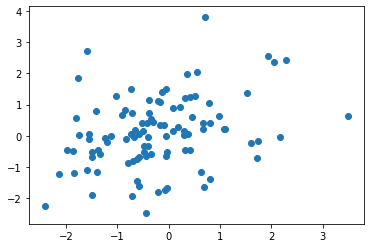

In [71]:
plt.scatter(x,y)

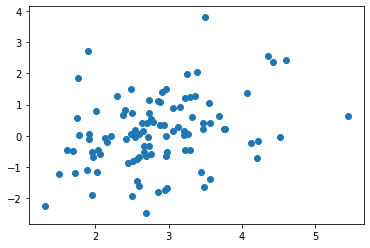

In [76]:
plt.scatter(x2,y)

In [77]:
np.corrcoef(x,y)

array([[1.        , 0.32375702],
       [0.32375702, 1.        ]])

In [78]:
np.corrcoef(x2,y)

array([[1.        , 0.32375702],
       [0.32375702, 1.        ]])

In [260]:
9 / 300

0.03

#### Multigenerational mobility

In [261]:
n_mul = 300 
z_range_mul = 9
r_mul = 0.5
r_s_mul = 1


In [262]:
gen_0 = tree.normal_distribution(n_mul, z_range_mul, mean_gen, sd_gen)

In [263]:
gen_1 = tree.final_superimposed_distribution_all_area_adj(gen_0, r_mul, r_s_mul)  

In [659]:
tree.area_scale_factor_entire(gen_1)

0.9999936733797483 0.9999936733797485


0.9999999999999998

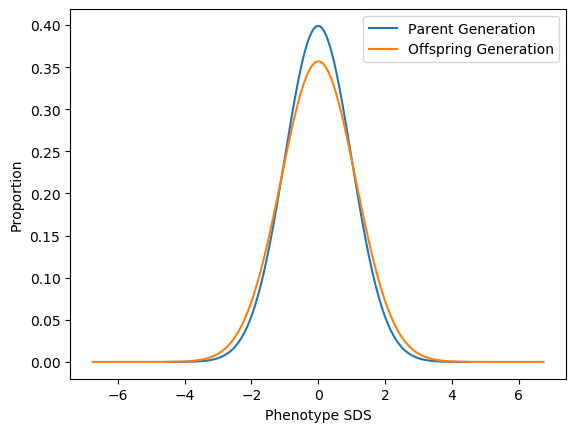

In [264]:
tree.plot_distribution(gen_0, label='Parent Generation') 
tree.plot_distribution(gen_1, label='Offspring Generation') 
plt.legend()
plt.show()

In [265]:
step_gen_0 = tree.step_proportion_attributable_percentile(gen_0, r_mul, \
                                        r_s_mul, 0.2, gen_1)

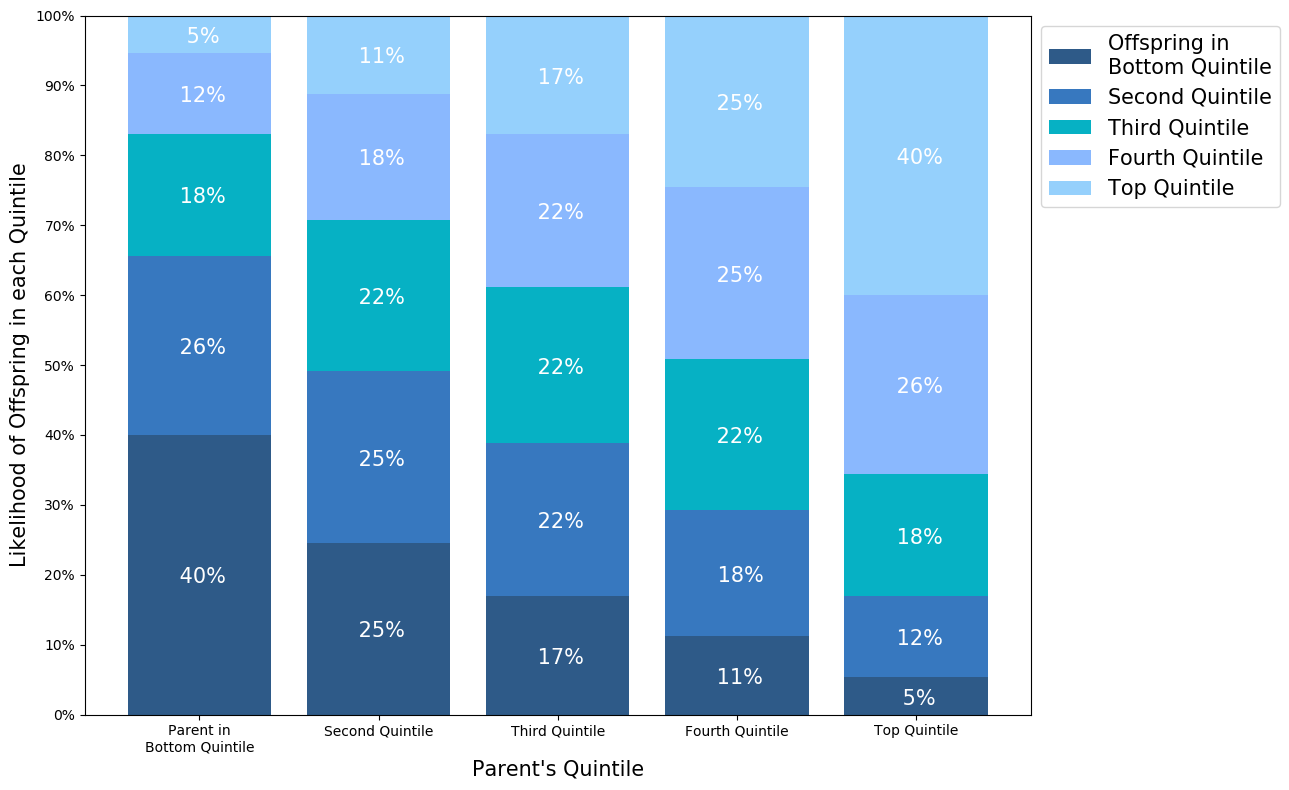

In [266]:
plt.figure(figsize=(13,8))
tree.bar_graph_step(step_gen_0)
plt.tight_layout()
plt.show()

In [326]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

In [ ]:
gen_1s = tree.initialize_gen_1s(gen_0=gen_0, r=r_mul, r_s=r_s_mul, percentile_step=0.2)

0.19614556365519425
0.20308709584115367
0.2012842870352504


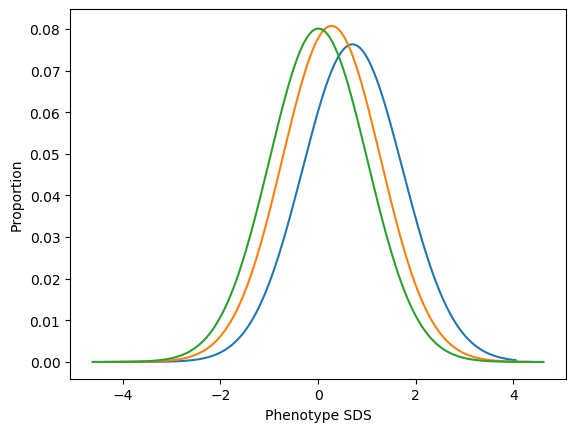

In [330]:
for row in gen_1s:
    tree.plot_distribution(row)
    print(tree.area_under_one_distribution(row))

In [340]:
gen_1_tops = tree.offspring_distributions(gen_0, r_mul, r_s_mul, above_k_v_p=st.norm.ppf(0.8))

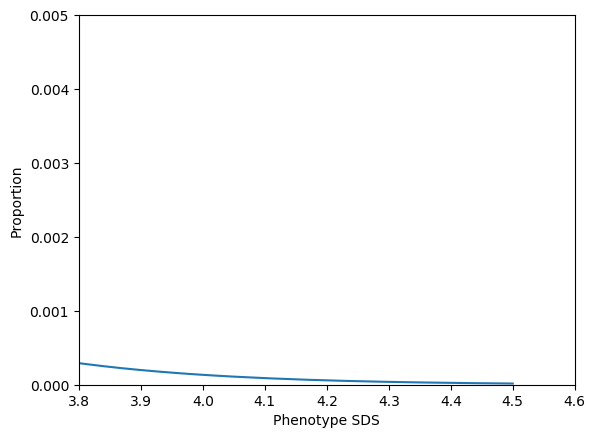

In [481]:
plt.xlim(3.8, 4.6)
plt.ylim(0, 0.005)
tree.plot_distribution(gen_0)

In [483]:
gen_0[0]

[-4.5,
 1.5983741106905475e-05,
 ['increment', 0.03],
 ['number', 300],
 ['bound', 9],
 ['mean', 0],
 ['sd', 1]]

In [484]:
gen_1_top = tree.final_superimposed_distribution(gen_0, r_mul, r_s_mul, \
                                                 above_k_v_p=st.norm.ppf(0.8))

In [606]:
gen_1_top = tree.final_superimposed_distribution(gen_0, r_mul, r_s_mul, \
                                                 above_k_v_p=st.norm.ppf(0.8))

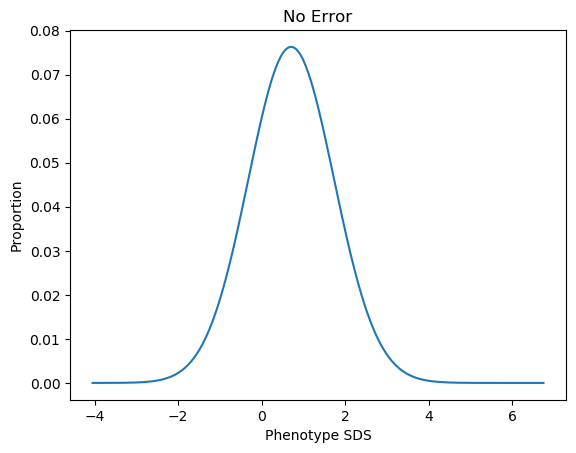

In [622]:
# plt.xlim(3.8, 4.6)
# plt.ylim(0, 0.005)
tree.plot_distribution(gen_1_top)
plt.title('No Error')
plt.show()

#### All the individual distributions

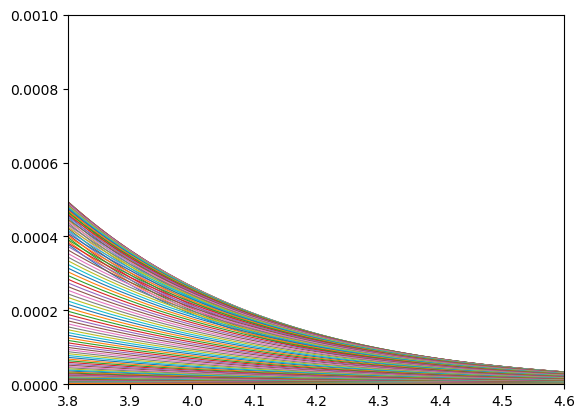

In [486]:
plt.xlim(3.8,4.6)
plt.ylim(0,0.001)
tree.plot_distributions(gen_1_tops)

#### Combine the individual distributions

In [353]:
super_offspring_distribution = tree.superimposed_offspring_distribution(gen_1_tops)

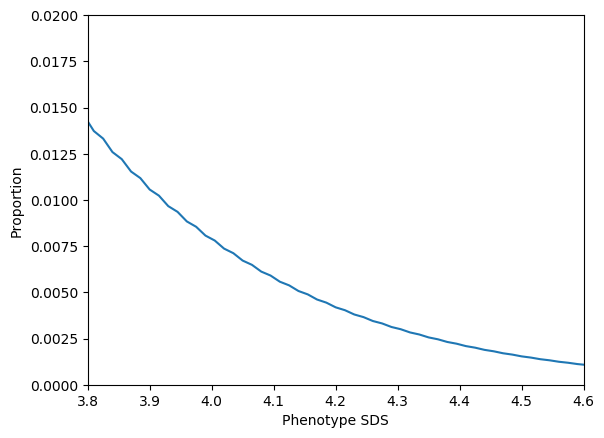

In [417]:
plt.xlim(3.8,4.6)
plt.ylim(0,0.02)
tree.plot_distribution(super_offspring_distribution)

In [421]:
super_offspring_distribution[0]

[-4.065,
 4.3674682419652334e-06,
 ['increment', 0.015],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [422]:
super_offspring_distribution[-1]

[6.75, 2.5547997977257987e-10]

In [586]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

#### Normalize them to the parent increment

In [367]:
par_inc_super_offspring_distribution = \
        tree.normalized_superimposed_distribution_to_parent_increment(super_offspring_distribution)

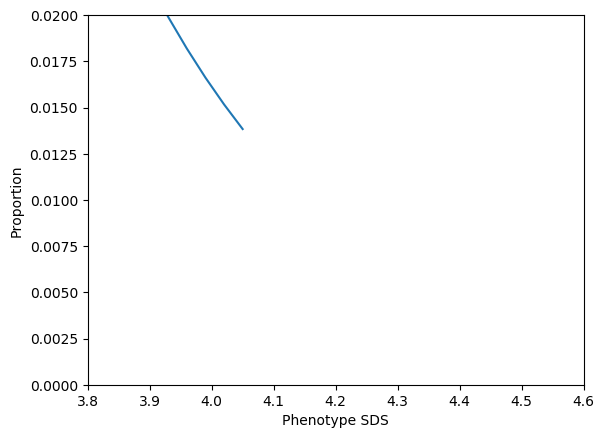

In [418]:
plt.xlim(3.8,4.6)
plt.ylim(0,0.02)
tree.plot_distribution(par_inc_super_offspring_distribution)

And it cuts off!! We've found our bug.

In [604]:
par_inc_super_offspring_distribution = \
        tree.normalized_superimposed_distribution_to_parent_increment(super_offspring_distribution)

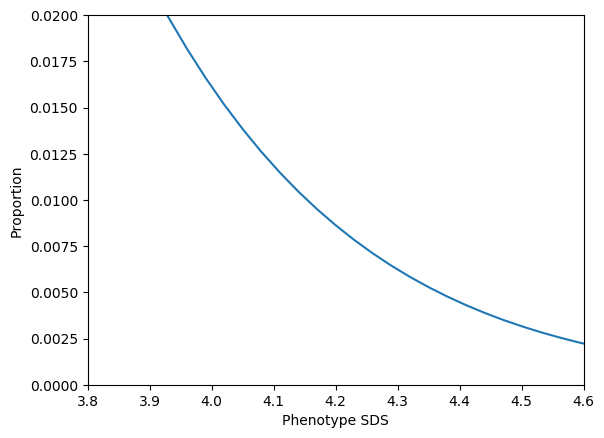

In [605]:
plt.xlim(3.8,4.6)
plt.ylim(0,0.02)
tree.plot_distribution(par_inc_super_offspring_distribution)

Bug fixed?

In [372]:
gen_0[0]

[-4.5,
 1.5983741106905475e-05,
 ['increment', 0.03],
 ['number', 300],
 ['bound', 9],
 ['mean', 0],
 ['sd', 1]]

In [419]:
# The one with the error
par_inc_super_offspring_distribution[0]

[-4.05,
 8.620505988713177e-06,
 ['increment', 0.03],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [420]:
# Cuts off too soon
par_inc_super_offspring_distribution[-1]

[4.05, 0.01383490554641128]

In [387]:
ROUND_NUMBER = 6
superimposed_distribution = super_offspring_distribution  # rename to function name

In [598]:
superimposed_distribution[0]

[-4.065,
 4.3674682419652334e-06,
 ['increment', 0.015],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [580]:
test0 = normalized_superimposed_distribution_to_parent_increment(superimposed_distribution, \
                    gen_num=0)

test1 = normalized_superimposed_distribution_to_parent_increment(superimposed_distribution, \
                    gen_num=1)

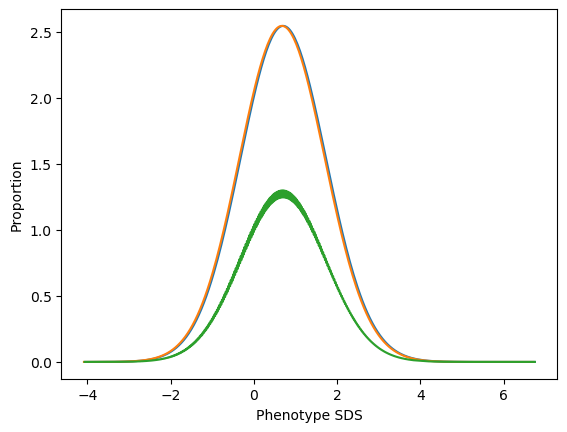

In [581]:
# plt.xlim(3.8,4.6)
# plt.ylim(0,0.02)
tree.plot_distribution(test0)
tree.plot_distribution(test1)
tree.plot_distribution(superimposed_distribution)

In [624]:
superimposed_distribution[0]

[-4.065,
 4.3674682419652334e-06,
 ['increment', 0.015],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [582]:
test0[-1]

[6.75, 5.477546610837867e-10]

In [583]:
test1[-1]

[6.72, 5.477546610837867e-10]

In [658]:
superimposed_distribution[0]

[-4.065,
 4.3674682419652334e-06,
 ['increment', 0.015],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

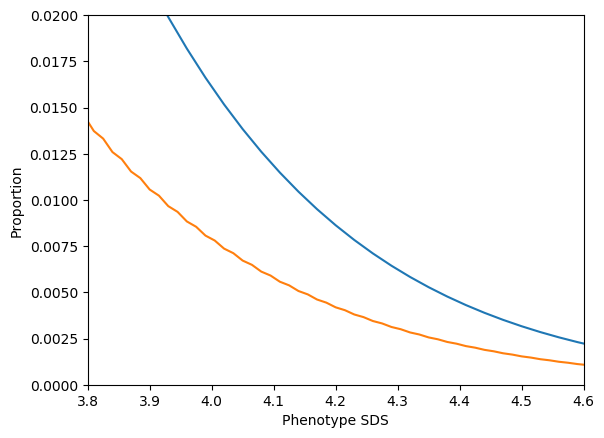

In [585]:
plt.xlim(3.8,4.6)
plt.ylim(0,0.02)
tree.plot_distribution(test0)
tree.plot_distribution(super_offspring_distribution)

In [331]:
gen_1s_test = tree.initialize_gen_1s(gen_0=gen_0, r=1, r_s=r_s_mul, percentile_step=0.2)

In [336]:
# for row in gen_1s_test:
#     tree.plot_distribution(row)
#     print(tree.area_under_one_distribution(row))

In [319]:
gen_test = tree.final_superimposed_distribution(gen_0, r_mul, r_s_mul, \
                                                 below_k_v_p=st.norm.ppf(1))

In [267]:
gen_1_top = tree.final_superimposed_distribution(gen_0, r_mul, r_s_mul, \
                                                 above_k_v_p=st.norm.ppf(0.8))

In [268]:
gen_1_fourth = tree.final_superimposed_distribution(gen_0, \
            r_mul, r_s_mul, above_k_v_p=st.norm.ppf(0.6), below_k_v_p=st.norm.ppf(0.8))

In [269]:
gen_1_third = tree.final_superimposed_distribution(gen_0, \
            r_mul, r_s_mul, above_k_v_p=st.norm.ppf(0.4), below_k_v_p=st.norm.ppf(0.6))

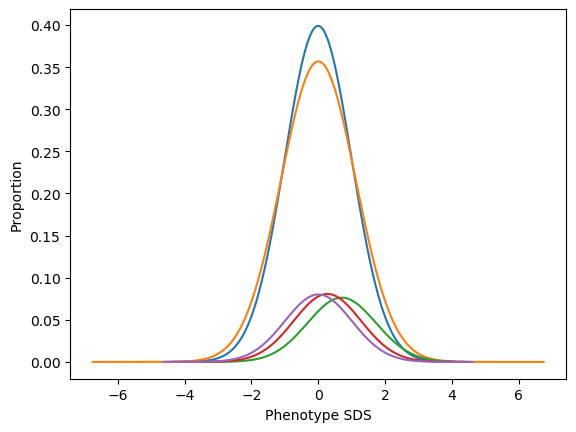

In [324]:
tree.plot_distribution(gen_0)
tree.plot_distribution(gen_1)
tree.plot_distribution(gen_1_top)
tree.plot_distribution(gen_1_fourth)
tree.plot_distribution(gen_1_third)
plt.show()

In [271]:
gen_1_top_par = tree.final_super_to_parent(gen_1_top)

In [272]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

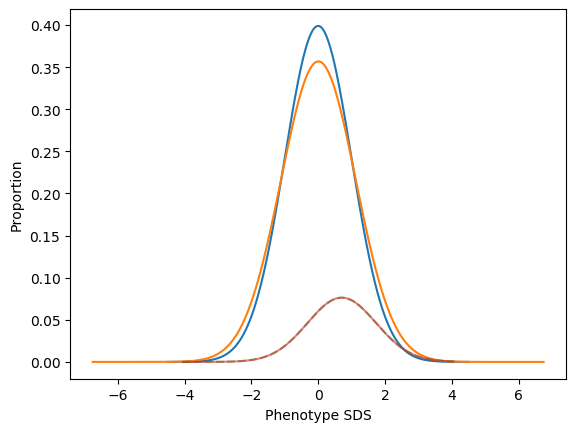

In [273]:
tree.plot_distribution(gen_0)
tree.plot_distribution(gen_1)
tree.plot_distribution(gen_1_top, linestyle='--', alpha=0.6)
tree.plot_distribution(gen_1_top_par, alpha=0.6)

In [274]:
gen_2_top_top = tree.final_superimposed_distribution(gen_1_top_par, r_mul, r_s_mul, \
                                                 above_k_v_p=st.norm.ppf(0.8))

In [752]:
gen_2_top = tree.final_superimposed_distribution(gen_1_top_par, r_mul, r_s_mul)

This all assumes same standard deviation!!

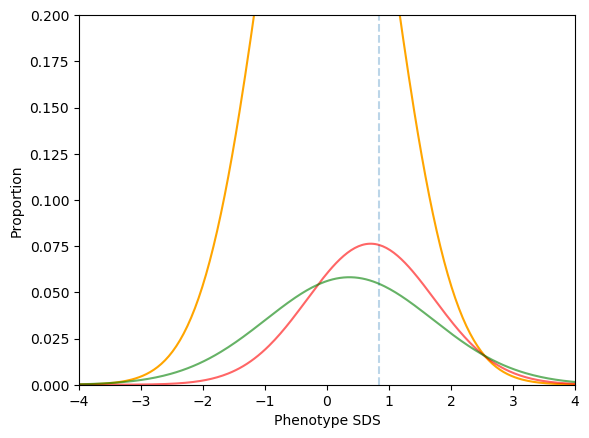

In [314]:
# tree.plot_distribution(gen_0)
# tree.plot_distribution(gen_1)
plt.ylim(0,0.2)
plt.xlim(-4,4)
plt.axvline(x=st.norm.ppf(0.8), linestyle='--', alpha=0.3)
tree.plot_distribution(gen_0, color='orange')
tree.plot_distribution(gen_1_top_par, alpha=0.6, color='red')
tree.plot_distribution(gen_2_top, alpha=0.6, color='green')
# tree.plot_distribution(gen_2_top_top)

In [316]:
print(tree.area_under_one_distribution(gen_1_top_par))
tree.area_under_one_distribution(gen_2_top)


0.19614556365519425


0.19614556365519428

In [285]:
gen_2_top[len(gen_2_top) // 2]

[0.0, 0.0560927850043802]

In [286]:
gen_2_top_top[len(gen_2_top_top) // 2]

[0.0, 0.022199809858366393]

In [297]:
def get_max(dist):
    max_ = 0
    max_index = 0
    for i in range(len(dist)):
        if dist[i][1] > max_:
            max_ = dist[i][1]
            max_index = i
            
    return max_index, max_

In [300]:
get_max(gen_1_top)

(159, 0.07629789946548343)

In [301]:
get_max(gen_2_top)

(214, 0.058165732519539985)

In [597]:
def initialize_gen_1s(gen_0, r, r_s, gen_1, percentile_step=0.2):
    below_k_p = 1
    above_k_p = 1 - percentile_step
    
    parent_area_factor = area_scale_factor_entire(gen_1)
    
    gen_1s = list()
    while below_k_p > 0.5:
        above_k_p_v = percentile_to_value(above_k_p, gen_0)
        below_k_p_v = percentile_to_value(below_k_p, gen_0)

        gen_1s.append(final_superimposed_distribution(gen_0, r, r_s,
                                                      above_k_v_p=above_k_p_v,
                                                      below_k_v_p=below_k_p_v, 
                                                     parent_area_factor=parent_area_factor))
                                                    # st.norm.ppf(gen_cov(above_k_p))

        above_k_p = round(above_k_p - percentile_step, ROUND_NUMBER)
        below_k_p = round(below_k_p - percentile_step, ROUND_NUMBER)

    return gen_1s

In [592]:
gen_1_top_par[0]

[-4.05,
 2.586168158317793e-07,
 ['increment', 0.03],
 ['number', 270],
 ['bound', 8.1],
 ['mean', 0.0],
 ['sd', 1.245659372484418]]

In [599]:
gen_1_top[0]

[-4.05,
 2.586168158317793e-07,
 ['increment', 0.03],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [647]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

0.9999936733797483 0.9999936733797485


In [ ]:
gen_1_top_test = tree.final_superimposed_distribution(gen_0, r_mul, r_s_mul, \
                                                      above_k_v_p=st.norm.ppf(0.8), \
                                                     parent_area_factor=5)

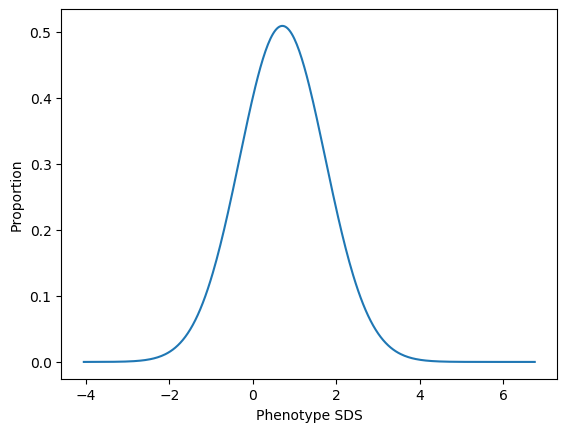

In [656]:
tree.plot_distribution(gen_1_top_test)

In [657]:
tree.area_under_one_distribution(gen_1_top_test)

1.3084152891389944

In [689]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

In [688]:
gen_1s = tree.initialize_gen_1s(gen_0=gen_0, r=r_mul, r_s=r_s_mul, gen_1=gen_1, \
                                percentile_step=0.2)

33.33291155998416 0.9999936733797485


In [673]:
gen_1 = tree.final_superimposed_distribution_all_area_adj(gen_0, r_mul, r_s_mul)  

33.33291155998416 0.9999936733797485


In [690]:
gen_1s_pars = list()
for row in gen_1s:
    gen_1s_pars.append(tree.final_super_to_parent(row))

0.19625011869248452
0.20309087611883883
0.20128405442168754


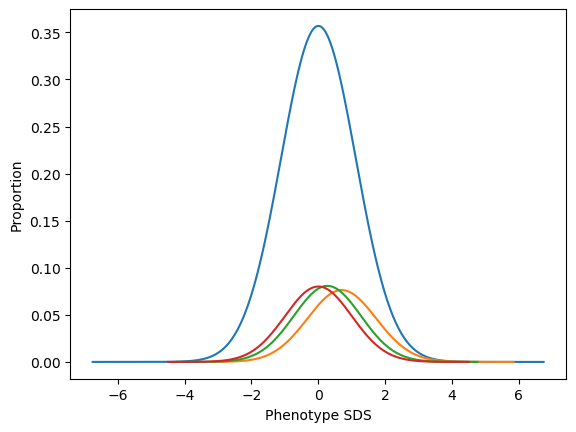

In [691]:
tree.plot_distribution(gen_1)
for row in gen_1s_pars:
    tree.plot_distribution(row)
    print(tree.area_under_one_distribution(row))

In [692]:
gen_1s[0][0]

[-4.05,
 2.586168158317793e-07,
 ['increment', 0.03],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [700]:
gen_1s_pars[0][0]

[-3.15,
 5.9056215804544385e-05,
 ['increment', 0.03],
 ['number', 300],
 ['bound', 9.0],
 ['mean', 1.35],
 ['sd', 1.2083107266981672]]

In [694]:
gen_0[0]

[-4.5,
 1.5983741106905475e-05,
 ['increment', 0.03],
 ['number', 300],
 ['bound', 9],
 ['mean', 0],
 ['sd', 1]]

### Test run

Okay let's simulate what we want to do, say for generation 2. That means we're calculating the generalized transition matrix for grandparents. 
*Sidenote: We can check the final function we get for generation 1, it should compare well*

In [723]:
n_mul = 300 
z_range_mul = 9
r_mul = 0.5
r_s_mul = 1
perc = 0.2

In [707]:
gen_0_par = tree.normal_distribution(n_mul, z_range_mul, mean_gen, sd_gen)

In [708]:
gen_1 = tree.final_superimposed_distribution_all_area_adj(gen_0, r_mul, r_s_mul)  

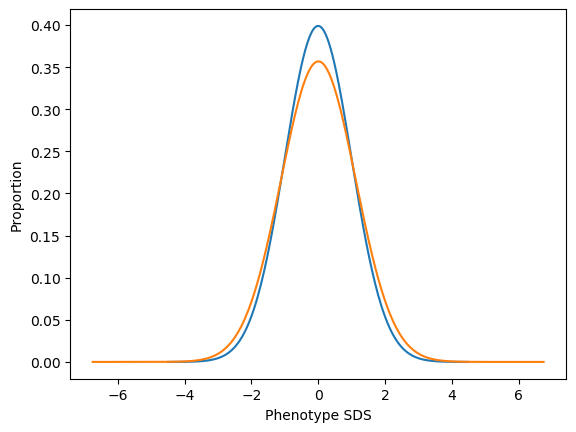

In [718]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1)

In [719]:
print(tree.st_dev_of_distribution(gen_0_par))
print(tree.st_dev_of_distribution(gen_1))

0.9999325927346115
1.1180089389025003


In [714]:
gen_1_par = tree.final_super_to_parent(gen_1)

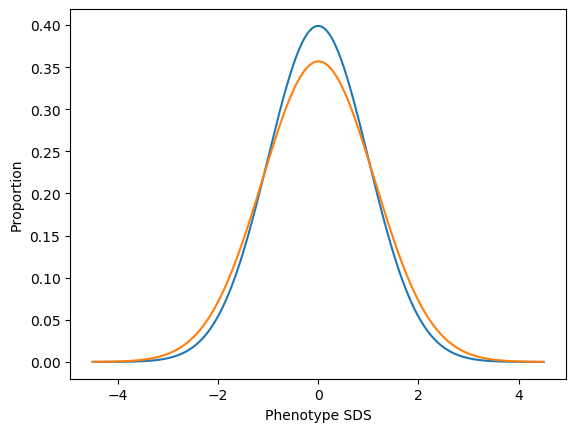

In [720]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1_par)

In [721]:
print(tree.st_dev_of_distribution(gen_0_par))
print(tree.st_dev_of_distribution(gen_1_par))

0.9999325927346115
1.1175357406161026


In [726]:
gen_1_dscts = tree.initialize_gen_1s(gen_0_par, r_mul, r_s_mul, perc)

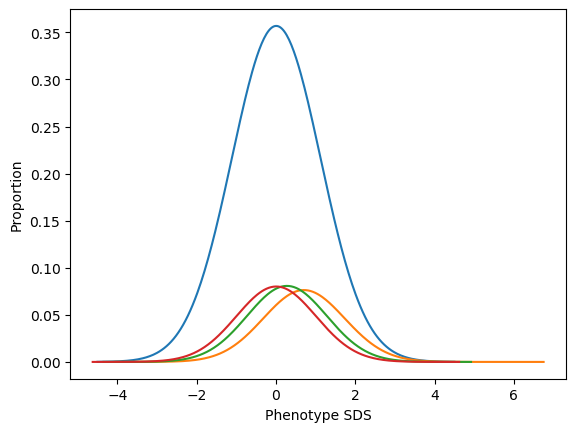

In [728]:
tree.plot_distribution(gen_1_par)
for row in gen_1_dscts:
    tree.plot_distribution(row)

In [734]:
for row in gen_1_dscts:
    print(row[0])
    print()

[-4.05, 2.586168158317793e-07, ['increment', 0.03], ['parent increment', 0.03], ['parent mean', 0], ['parent area', 0.9999936733797485], ['parent number', 300], ['parent bound', 9.0]]

[-4.35, 3.673328988360052e-07, ['increment', 0.03], ['parent increment', 0.03], ['parent mean', 0], ['parent area', 0.9999936733797485], ['parent number', 300], ['parent bound', 9.0]]

[-4.62, 1.8586808466358564e-07, ['increment', 0.03], ['parent increment', 0.03], ['parent mean', 0], ['parent area', 0.9999936733797485], ['parent number', 300], ['parent bound', 9.0]]



In [729]:
gen_1_dscts_par = list()
for row in gen_1_dscts:
    to_par = tree.final_super_to_parent(row)
    gen_1_dscts_par.append(to_par)

In [810]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

In [811]:
gen_1_dscts_par_c = list()
for row in gen_1_dscts:
    gen_1_dscts_par_c.append(tree.final_super_to_parent(row, population_mean=0))

In [813]:
gen_1_dscts_par[0][0]

[-3.15,
 5.9056215804544385e-05,
 ['increment', 0.03],
 ['number', 300],
 ['bound', 9.0],
 ['mean', 1.35],
 ['sd', 1.2083107266981672]]

In [816]:
gen_1_dscts_par_c[0][0:2]

[[-3.15,
  5.9056215804544385e-05,
  ['increment', 0.03],
  ['number', 300],
  ['bound', 9.0],
  ['mean', 0],
  ['sd', 1.2083107266981672]],
 [-3.12, 6.603763494688705e-05, 'parent_mean', 0.72]]

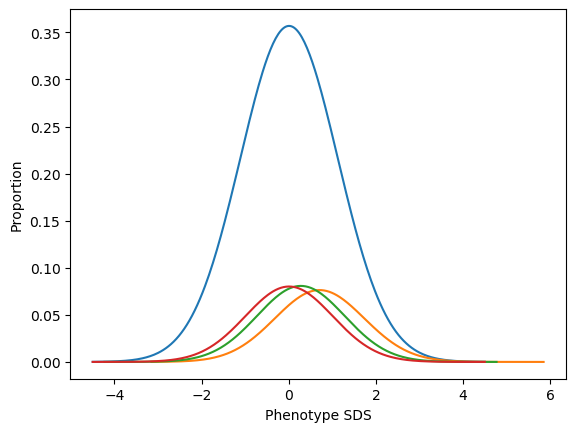

In [730]:
tree.plot_distribution(gen_1_par)
for row in gen_1_dscts_par:
    tree.plot_distribution(row)

In [743]:
for row in gen_1_dscts_par:
    print(row[0])
    print(len(row))
    print()

[-3.15, 5.9056215804544385e-05, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 1.35], ['sd', 1.2083107266981672]]
301

[-4.23, 2.3510546080217377e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 0.27], ['sd', 1.0035995931243011]]
301

[-4.5, 2.191783193195842e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 0.0], ['sd', 1.0026590546306875]]
301



### Generation two!

In [737]:
gen_2 = tree.final_superimposed_distribution_all_area_adj(gen_1_par, r_mul, r_s_mul)  

In [739]:
gen_2_par = tree.final_super_to_parent(gen_2)

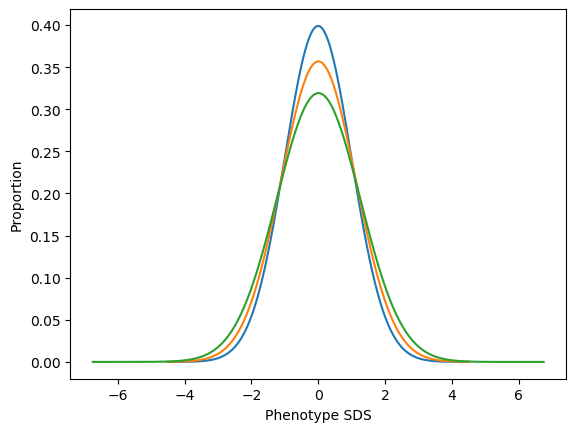

In [738]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1_par)
tree.plot_distribution(gen_2)

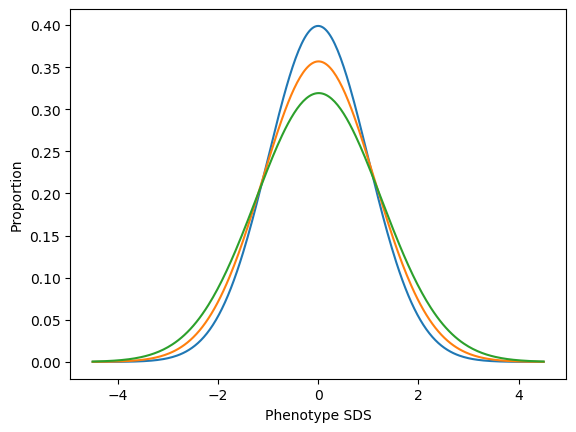

In [740]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1_par)
tree.plot_distribution(gen_2_par)

In [741]:
print(tree.st_dev_of_distribution(gen_2_par))

1.2471827782922165


In [744]:
gen_2_dscts = list()
for row in gen_1_dscts_par:
    gen_2_dscts.append(tree.final_superimposed_distribution_all_area_adj(row, r_mul, r_s_mul))

In [746]:
gen_2_dscts_par = list()
for row in gen_2_dscts:
    gen_2_dscts_par.append(tree.final_super_to_parent(row))

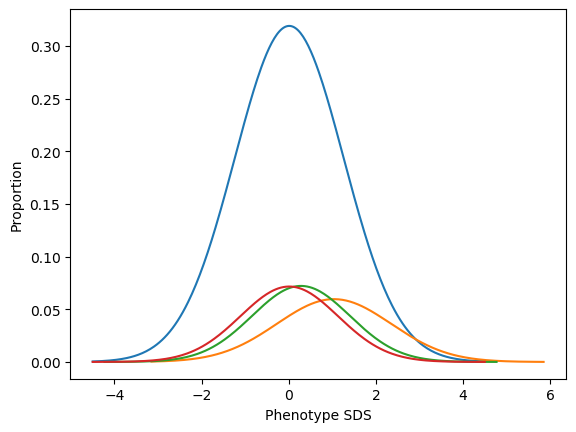

In [751]:
tree.plot_distribution(gen_2_par)
for row in gen_2_dscts_par:
    tree.plot_distribution(row)

In [749]:
for row in gen_2_dscts_par:
    print(tree.area_under_one_distribution(row))
    print(row[0])
    print(len(row))
    print()

0.19611818552328744
[-3.15, 0.0003576606884364917, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 1.35], ['sd', 1.3475728990475884]]
301

0.2030801582566952
[-4.23, 2.182927170168482e-05, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 0.27], ['sd', 1.1220636240489348]]
301

0.20127359688508603
[-4.5, 2.1325694514985696e-05, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 0.0], ['sd', 1.1210145432272567]]
301



0.72


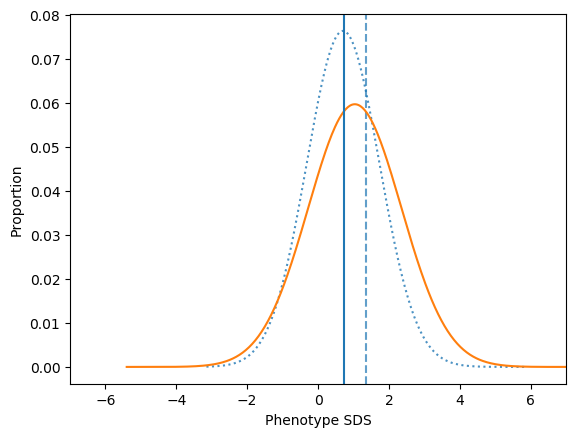

In [822]:
plt.xlim(-7,7)
# tree.plot_distribution(gen_1_dscts[0], alpha=0.8)
tree.plot_distribution(gen_1_dscts_par[0], alpha=0.8, linestyle=':')
plt.axvline(x=mean_dist(gen_1_dscts[0]), alpha=0.7, linestyle='--')
tree.plot_distribution(gen_2_dscts[0])
# tree.plot_distribution(gen_2_dscts_par[0])
plt.axvline(x=tree.true_mean(gen_1_dscts[0]))
print(tree.true_mean(gen_1_dscts[0]))

In [760]:
def mean_dist(dist):
    mid_index = (len(dist) - 1) // 2
    return dist[mid_index][0]


In [761]:
mean_dist(gen_1_dscts_par[0])

1.35

In [762]:
mean_dist(gen_2_dscts_par[0])

1.35

In [765]:
(len(gen_2_dscts_par[0]) - 1) // 2

150

In [804]:
def true_mean(dist):
    # gives the probability weighted mean/also median for any 
    max_ = 0
    max_index = 0
    for i in range(len(dist)):
        if dist[i][1] > max_:
            max_ = dist[i][1]
            max_index = i
    return dist[max_index][0]

The parent mean is what is being used for regression, we want to use zero but instead we're using different values. Maybe we should rename it population mean and add another variable for parent mean? That seems to be the solution with the least number of changes. This problem will fix the lack of regression that we've been seeing. *Fixed, though not tested for regression*

It used to regress to the mean because of the previous bug. In other words, the previous bug fixed a future problem, lol. The previous bug was that it limited the final super distribution to be about the parent mean, which insured that when the mid_index was calculated, we got a parent mean of 0. This is not that hard just rename the parent mean to be population mean and pass it in somehow. We can add a section for parent mean. 

len() - 1) // 2 only works when it's centered about the mean, but it's not in our cases. This becomes an issue when we convert to parent, we want to be converting to parent about the true (probability weighted) mean, also median.

In [827]:
gen_1_dscts[0][0]

[-4.05,
 2.586168158317793e-07,
 ['increment', 0.03],
 ['parent increment', 0.03],
 ['parent mean', 0],
 ['parent area', 0.9999936733797485],
 ['parent number', 300],
 ['parent bound', 9.0]]

In [828]:
len(gen_0)

301

In [831]:
len(gen_1)

451

In [832]:
len(gen_1_par)

301

In [842]:
len(gen_1_dscts[0]) - 1

360

In [843]:
len(gen_1_dscts_par[0]) - 1

300

In [844]:
360 - 300

60

In [846]:
60 // 2

30

In [848]:
300 // 2

150

In [849]:
par_max = 300

In [850]:
par_max // 2

150

In [851]:
true_mean_index = 50

In [852]:
true_mean_index - (par_max // 2)

-100

### Second attempt
(Hopefully with the bugs fixed)

Okay let's simulate what we want to do, say for generation 2. That means we're calculating the generalized transition matrix for grandparents. 
*Sidenote: We can check the final function we get for generation 1, it should compare well*

In [858]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

In [859]:
n_mul = 300 
z_range_mul = 9
r_mul = 0.5
r_s_mul = 1
perc = 0.2

In [860]:
gen_0_par = tree.normal_distribution(n_mul, z_range_mul, mean_gen, sd_gen)

In [861]:
gen_1 = tree.final_superimposed_distribution_all_area_adj(gen_0, r_mul, r_s_mul)  

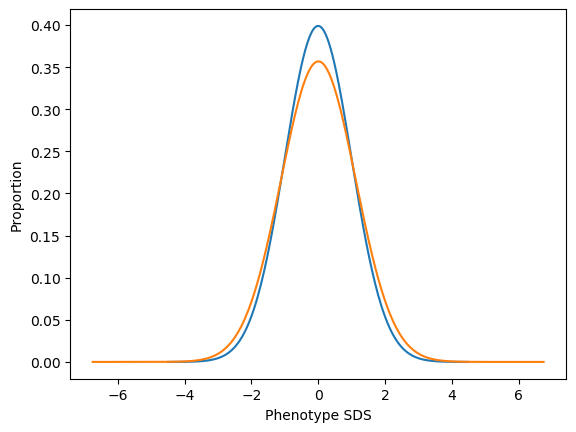

In [862]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1)

In [863]:
print(tree.st_dev_of_distribution(gen_0_par))
print(tree.st_dev_of_distribution(gen_1))

0.9999325927346115
1.1180089389025003


In [864]:
gen_1_par = tree.final_super_to_parent(gen_1)

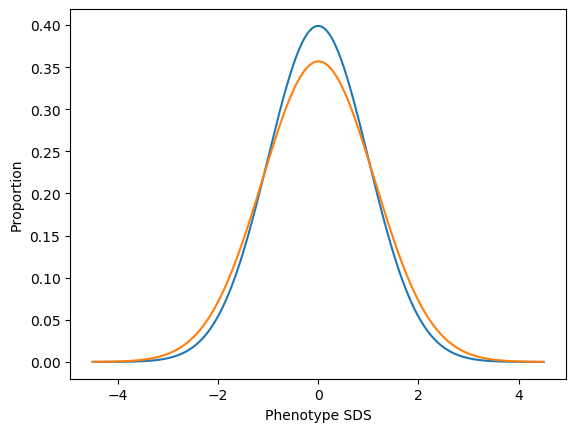

In [865]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1_par)

In [866]:
print(tree.st_dev_of_distribution(gen_0_par))
print(tree.st_dev_of_distribution(gen_1_par))

0.9999325927346115
1.1175357406161026


In [867]:
gen_1_dscts = tree.initialize_gen_1s(gen_0_par, r_mul, r_s_mul, perc)

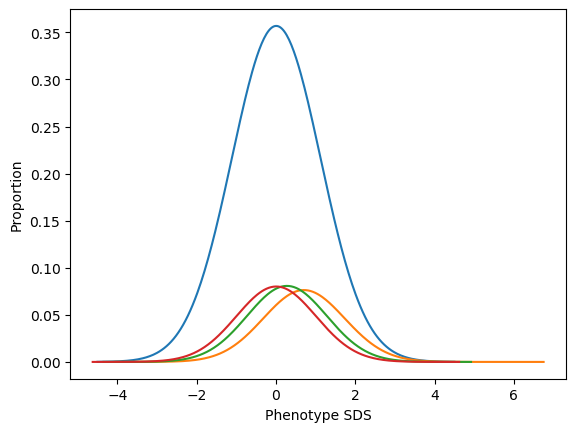

In [868]:
tree.plot_distribution(gen_1_par)
for row in gen_1_dscts:
    tree.plot_distribution(row)

In [869]:
for row in gen_1_dscts:
    print(row[0])
    print()

[-4.05, 2.586168158317793e-07, ['increment', 0.03], ['parent increment', 0.03], ['parent mean', 0], ['parent area', 0.9999936733797485], ['parent number', 300], ['parent bound', 9.0]]

[-4.35, 3.673328988360052e-07, ['increment', 0.03], ['parent increment', 0.03], ['parent mean', 0], ['parent area', 0.9999936733797485], ['parent number', 300], ['parent bound', 9.0]]

[-4.62, 1.8586808466358564e-07, ['increment', 0.03], ['parent increment', 0.03], ['parent mean', 0], ['parent area', 0.9999936733797485], ['parent number', 300], ['parent bound', 9.0]]



In [870]:
gen_1_dscts_par = list()
for row in gen_1_dscts:
    to_par = tree.final_super_to_parent(row, population_mean=0)
    gen_1_dscts_par.append(to_par)

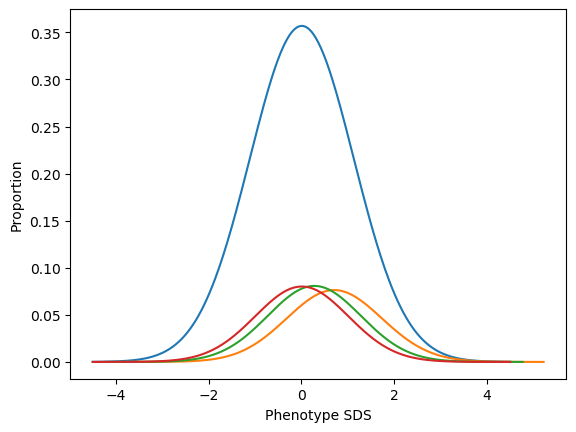

In [872]:
tree.plot_distribution(gen_1_par)
for row in gen_1_dscts_par:
    tree.plot_distribution(row)

In [892]:
for row in gen_1_dscts_par:
    print(row[0:2])
    print(len(row))
    print()

[[-3.78, 4.107331491681234e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.0266710270380213]], [-3.75, 4.800497127914442e-06, 'parent_mean', 0.72]]
301

[[-4.23, 2.3510546080217377e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.0035995931243011]], [-4.2, 3.006473872016383e-06, 'parent_mean', 0.27]]
301

[[-4.5, 2.191783193195842e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.0026590546306875]], [-4.47, 2.885115866003945e-06, 'parent_mean', 0.0]]
301



### Generation two!

In [874]:
gen_2 = tree.final_superimposed_distribution_all_area_adj(gen_1_par, r_mul, r_s_mul)  

In [875]:
gen_2_par = tree.final_super_to_parent(gen_2)

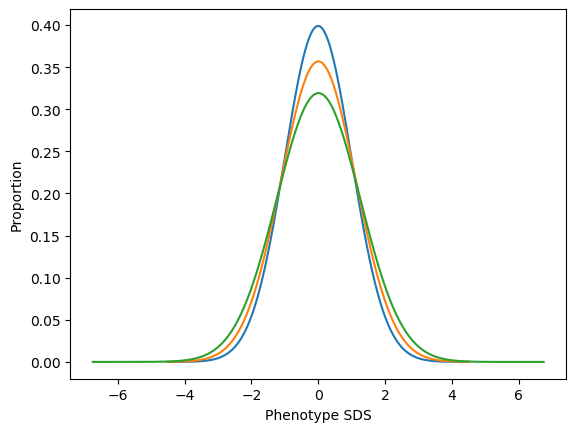

In [876]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1_par)
tree.plot_distribution(gen_2)

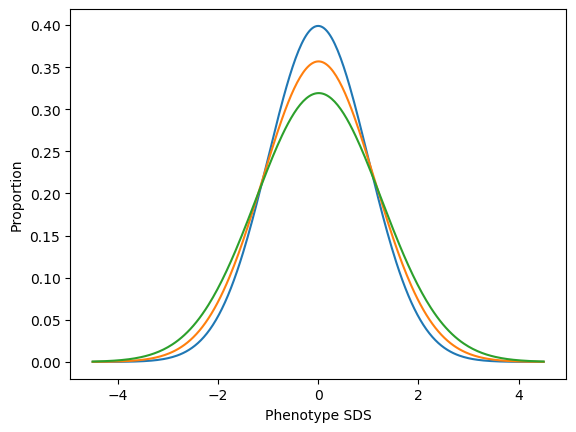

In [877]:
tree.plot_distribution(gen_0_par)
tree.plot_distribution(gen_1_par)
tree.plot_distribution(gen_2_par)

In [878]:
print(tree.st_dev_of_distribution(gen_2_par))

1.2471827782922165


In [879]:
print(gen_2_par[0])

[-4.5, 0.00045576672596962277, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['mean', 0.0], ['sd', 1.2494706415046433]]


In [880]:
gen_2_dscts = list()
for row in gen_1_dscts_par:
    gen_2_dscts.append(tree.final_superimposed_distribution_all_area_adj(row, r_mul, r_s_mul))

In [882]:
gen_2_dscts_par = list()
for row in gen_2_dscts:
    gen_2_dscts_par.append(tree.final_super_to_parent(row, population_mean=0))

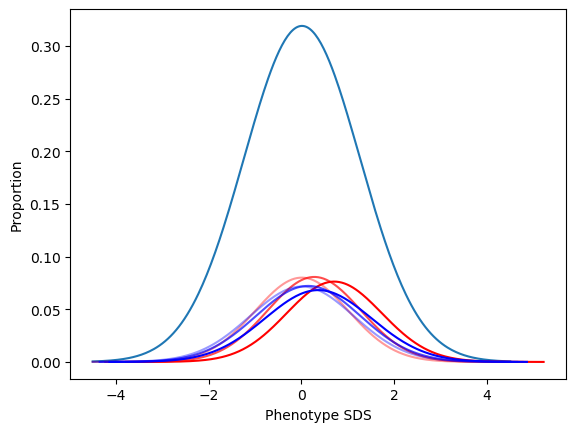

In [889]:
tree.plot_distribution(gen_2_par)
alpha = 1
for row in gen_1_dscts_par:
    tree.plot_distribution(row, color='red', alpha=alpha)
    alpha -= 0.3
alpha = 1
for row in gen_2_dscts_par:
    tree.plot_distribution(row, color='blue', alpha=alpha)
    alpha-= 0.3

In [899]:
for row in gen_2_dscts_par:
    print(tree.area_under_one_distribution(row))
    print(row[0:2])
    print(len(row))
    print()

0.1962471274994834
[[-4.14, 2.9894933710268322e-05, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.147761083700344]], [-4.11, 3.321561486835799e-05, 'parent_mean', 0.36]]
301

0.20308016643631466
[[-4.35, 2.3064940289023694e-05, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.1220177125499506]], [-4.32, 2.5730568048306468e-05, 'parent_mean', 0.15]]
301

0.20127359688508603
[[-4.5, 2.1325694514985696e-05, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.1210145432272567]], [-4.47, 2.38069613413548e-05, 'parent_mean', 0.0]]
301



In [900]:
for row in gen_1_dscts_par:
    print(tree.area_under_one_distribution(row))
    print(row[0:2])
    print(len(row))
    print()

0.19626215864608074
[[-3.78, 4.107331491681234e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.0266710270380213]], [-3.75, 4.800497127914442e-06, 'parent_mean', 0.72]]
301

0.20309087611883883
[[-4.23, 2.3510546080217377e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.0035995931243011]], [-4.2, 3.006473872016383e-06, 'parent_mean', 0.27]]
301

0.20128405442168754
[[-4.5, 2.191783193195842e-06, ['increment', 0.03], ['number', 300], ['bound', 9.0], ['population mean', 0], ['sd', 1.0026590546306875]], [-4.47, 2.885115866003945e-06, 'parent_mean', 0.0]]
301



0.72


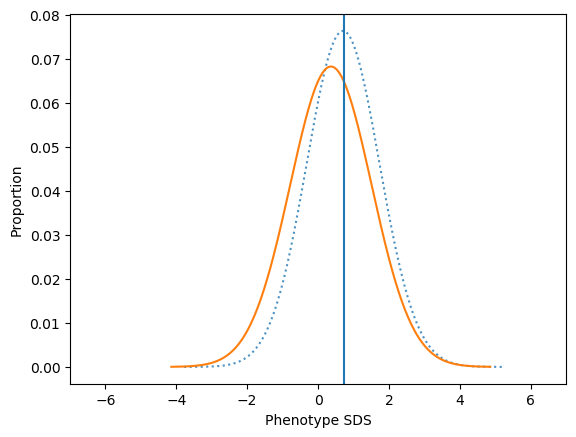

In [897]:
plt.xlim(-7,7)
# tree.plot_distribution(gen_1_dscts[0], alpha=0.8)
tree.plot_distribution(gen_1_dscts_par[0], alpha=0.8, linestyle=':')
tree.plot_distribution(gen_2_dscts_par[0])
# tree.plot_distribution(gen_2_dscts_par[0])
plt.axvline(x=tree.true_mean(gen_1_dscts[0]))
print(tree.true_mean(gen_1_dscts[0]))

### The bugs are fixed! 
Now we just need to figure out the quintile matrix with these combined distributions, shouldn't be too bad.